In [44]:
import pandas as pd
import seaborn as sns
color = sns.color_palette()
sns.set_style('darkgrid')
import warnings
def ignore_warn(*args, **kwargs):
    pass
warnings.warn = ignore_warn #ignore annoying warning (from sklearn and seaborn)

from scipy import stats
from scipy.stats import norm, skew #for some statistics

flight_data = pd.read_excel('Data_Train.xlsx')
flight_data_test = pd.read_excel('Test_set.xlsx')
flight_data

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302
5,SpiceJet,24/06/2019,Kolkata,Banglore,CCU → BLR,09:00,11:25,2h 25m,non-stop,No info,3873
6,Jet Airways,12/03/2019,Banglore,New Delhi,BLR → BOM → DEL,18:55,10:25 13 Mar,15h 30m,1 stop,In-flight meal not included,11087
7,Jet Airways,01/03/2019,Banglore,New Delhi,BLR → BOM → DEL,08:00,05:05 02 Mar,21h 5m,1 stop,No info,22270
8,Jet Airways,12/03/2019,Banglore,New Delhi,BLR → BOM → DEL,08:55,10:25 13 Mar,25h 30m,1 stop,In-flight meal not included,11087
9,Multiple carriers,27/05/2019,Delhi,Cochin,DEL → BOM → COK,11:25,19:15,7h 50m,1 stop,No info,8625


In [45]:
flight_data.dropna(subset=['Total_Stops'], inplace=True)
flight_data.shape
flight_data_test.dropna(subset=['Total_Stops'], inplace=True)

In [46]:
flight_data_test.Total_Stops.unique()

array(['1 stop', 'non-stop', '2 stops', '3 stops', '4 stops'],
      dtype=object)

In [47]:
stop_dict = {'non-stop':0,'2 stops': 2, '1 stop': 1, '3 stops': 3, '4 stops' : 4}
flight_data['Total_Stops'] = flight_data['Total_Stops'].map(stop_dict)
flight_data_test['Total_Stops'] = flight_data_test['Total_Stops'].map(stop_dict)

In [48]:
flight_data_test.Total_Stops.unique()

array([1, 0, 2, 3, 4], dtype=int64)

In [49]:
flight_data['Day_of_Journey'] = pd.to_datetime(flight_data.Date_of_Journey, format='%d/%m/%Y').dt.day
flight_data['Journey_Month'] = pd.to_datetime(flight_data.Date_of_Journey, format='%d/%m/%Y').dt.month
flight_data_test['Day_of_Journey'] = pd.to_datetime(flight_data_test.Date_of_Journey, format='%d/%m/%Y').dt.day
flight_data_test['Journey_Month'] = pd.to_datetime(flight_data_test.Date_of_Journey, format='%d/%m/%Y').dt.month

In [50]:

flight_data.drop(labels = 'Date_of_Journey', axis = 1, inplace = True)

flight_data_test.drop(labels = 'Date_of_Journey', axis = 1, inplace = True)

In [51]:
def clean_duration(data):
    duration = list(data['Duration'])
    for i in range(len(duration)):
        if len(duration[i].split()) != 2:
            if 'h' in duration[i]:
                duration[i] = duration[i].strip() + ' 0m'
            elif 'm' in duration[i] :
                duration[i] = '0h {}'.format(duration[i].strip())
    dur_hours = []
    dur_minutes = []  

    for i in range(len(duration)) :
        dur_hours.append(int(duration[i].split()[0][:-1]))
        dur_minutes.append(int(duration[i].split()[1][:-1]))

    data['Duration_hours'] = dur_hours
    data['Duration_minutes'] =dur_minutes

    data.drop(labels = 'Duration', axis = 1, inplace = True)
    return data

In [52]:
flight_data = clean_duration(flight_data)
flight_data_test = clean_duration(flight_data_test)

In [53]:
def convert_dep_arr_time(flight_data):
    flight_data['Depart_Time_Hour'] = pd.to_datetime(flight_data.Dep_Time).dt.hour
    flight_data['Depart_Time_Minutes'] = pd.to_datetime(flight_data.Dep_Time).dt.minute
    flight_data.drop(labels='Dep_Time', axis=1, inplace=True)
    flight_data['Arr_Time_Hour'] = pd.to_datetime(flight_data.Arrival_Time).dt.hour
    flight_data['Arr_Time_Minutes'] = pd.to_datetime(flight_data.Arrival_Time).dt.minute
    flight_data.drop(labels='Arrival_Time', axis=1, inplace=True)
    return flight_data

In [54]:
flight_data = convert_dep_arr_time(flight_data)
flight_data_test = convert_dep_arr_time(flight_data_test)

In [55]:
X_test = flight_data_test.iloc[:,:].values
X_test

array([['Jet Airways', 'Delhi', 'Cochin', ..., 30, 4, 25],
       ['IndiGo', 'Kolkata', 'Banglore', ..., 20, 10, 20],
       ['Jet Airways', 'Delhi', 'Cochin', ..., 15, 19, 0],
       ...,
       ['Jet Airways', 'Delhi', 'Cochin', ..., 50, 4, 25],
       ['Air India', 'Delhi', 'Cochin', ..., 0, 19, 15],
       ['Multiple carriers', 'Delhi', 'Cochin', ..., 55, 19, 15]],
      dtype=object)

In [56]:
print("Skewness: %f" % flight_data['Price'].skew())
print("Kurtosis: %f" % flight_data['Price'].kurt())

Skewness: 1.812405
Kurtosis: 13.301937


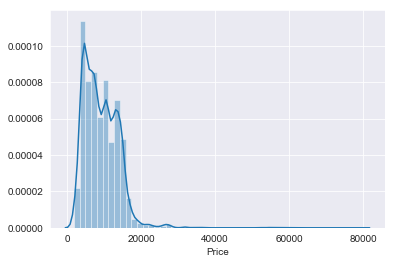

In [57]:
import seaborn as sns

sns.distplot(flight_data['Price']);


 mu = 9087.21 and sigma = 4611.33



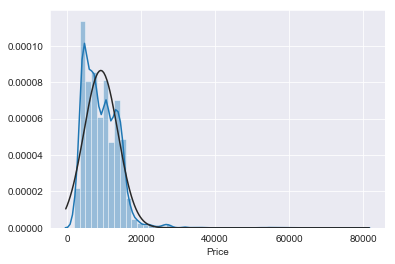

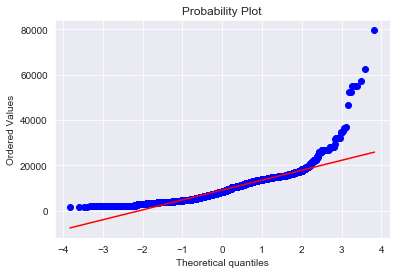

In [58]:
import matplotlib.pyplot as plt
def check_skewness(col):
    sns.distplot(flight_data[col] , fit=norm);
    fig = plt.figure()
    res = stats.probplot(flight_data[col], plot=plt)
    # Get the fitted parameters used by the function
    (mu, sigma) = norm.fit(flight_data[col])
    print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))
    
check_skewness('Price')


 mu = 8.99 and sigma = 0.51



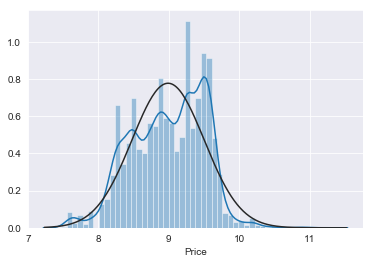

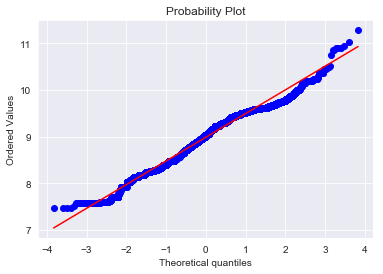

In [59]:
# from above it is clear that it is positively skewed so Here i am correcting it by performing lofg transform
import numpy as np
flight_data["Price"] = np.log1p(flight_data["Price"])

check_skewness('Price')

In [60]:
# numeric_dtypes = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
# numerics2 = []
# for i in flight_data.columns:
#     if flight_data[i].dtype in numeric_dtypes: 
#         numerics2.append(i)

# skew_features = flight_data[numerics2].apply(lambda x: skew(x)).sort_values(ascending=False)
# skews = pd.DataFrame({'skew':skew_features})
# skews

In [61]:
# from scipy.special import boxcox1p
# from scipy.stats import boxcox_normmax

# high_skew = skew_features[skew_features > 0.5]
# high_skew = high_skew
# skew_index = high_skew.index

# for i in skew_index:
#     flight_data[i]= boxcox1p(flight_data[i], boxcox_normmax(flight_data[i]+1))

        
# skew_features2 = flight_data[numerics2].apply(lambda x: skew(x)).sort_values(ascending=False)
# skews2 = pd.DataFrame({'skew':skew_features2})
# skews2

In [62]:
from sklearn.preprocessing import LabelEncoder
def encode_data(data):
    labelEncoder = LabelEncoder()
    data[:,0] = labelEncoder.fit_transform(data[:,0])
    
    data[:,1] = labelEncoder.fit_transform(data[:,1])

    data[:,2] = labelEncoder.fit_transform(data[:,2])

    data[:,3] = labelEncoder.fit_transform(data[:,3])

    data[:,4] = labelEncoder.fit_transform(data[:,4])

    data[:,5] = labelEncoder.fit_transform(data[:,5])
    return data

In [63]:
flight_data = pd.DataFrame(encode_data(flight_data.values))
flight_data[1].dtype

dtype('O')

In [64]:
from sklearn.ensemble import IsolationForest

clf = IsolationForest(max_samples = 100, random_state = 42)
clf.fit(flight_data)
y_noano = clf.predict(flight_data)
y_noano = pd.DataFrame(y_noano, columns = ['Top'])
y_noano[y_noano['Top'] == 1].index.values
flight_data = pd.DataFrame(flight_data)
flight_data = flight_data.iloc[y_noano[y_noano['Top'] == 1].index.values]
flight_data.reset_index(drop = True, inplace = True)
print("Number of Outliers:", y_noano[y_noano['Top'] == -1].shape[0])
print("Number of rows without outliers:", flight_data.shape[0])

Number of Outliers: 1069
Number of rows without outliers: 9613


In [65]:
flight_data

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,3,0,5,18,0,8,8.26822,24,3,2,50,22,20,1,10
1,1,3,0,84,2,8,8.94416,1,5,7,25,5,50,13,15
2,4,2,1,118,2,8,9.53842,9,6,19,0,9,25,4,25
3,3,3,0,91,1,8,8.73536,12,5,5,25,18,5,23,30
4,3,0,5,29,1,8,9.49574,1,3,4,45,16,50,21,35
5,8,3,0,64,0,8,8.26204,24,6,2,25,9,0,11,25
6,6,2,1,104,1,8,9.06254,27,5,7,50,11,25,19,15
7,1,2,1,103,1,8,9.09471,1,6,13,15,9,45,23,0
8,3,3,0,64,0,8,8.33687,18,4,2,35,20,20,22,55
9,1,1,4,127,0,8,8.44849,24,6,2,15,11,40,13,55


In [66]:
Y_train = flight_data.iloc[:,6].values
X_train = flight_data.iloc[:,flight_data.columns != 6].values


In [67]:
pd.DataFrame(X_train).head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,3,0,5,18,0,8,24,3,2,50,22,20,1,10
1,1,3,0,84,2,8,1,5,7,25,5,50,13,15
2,4,2,1,118,2,8,9,6,19,0,9,25,4,25
3,3,3,0,91,1,8,12,5,5,25,18,5,23,30
4,3,0,5,29,1,8,1,3,4,45,16,50,21,35


In [68]:
X_train = encode_data(X_train)
X_test = encode_data(X_test)

In [69]:
from sklearn.preprocessing import StandardScaler

sc_X = StandardScaler()

X_train = sc_X.fit_transform(X_train)

X_test = sc_X.transform(X_test)

# #sc_y = StandardScaler()

Y_train = Y_train.reshape((len(Y_train))) 

# Y_train = sc_X.fit_transform(Y_train)

# Y_train = Y_train.ravel()

In [70]:
print(pd.DataFrame(X_train).head())

         0         1         2         3         4         5         6   \
0 -0.394097 -1.923479  3.126323 -1.742000 -1.263940  0.477434  1.230415   
1 -1.270649  0.876401 -0.960677  0.090784  1.745411  0.477434 -1.505698   
2  0.044179 -0.056893 -0.143277  1.210819  1.745411  0.477434 -0.554007   
3 -0.394097  0.876401 -0.960677  0.294427  0.240736  0.477434 -0.197122   
4 -0.394097 -1.923479  3.126323 -1.504417  0.240736  0.477434 -1.505698   

         7         8         9         10        11        12        13  
0 -1.622679 -1.002618  1.276031  1.701789 -0.186429 -1.824229 -0.886462  
1  0.168127 -0.396024 -0.204535 -1.306280  1.445264 -0.051601 -0.580118  
2  1.063529  1.059801 -1.685101 -0.598499  0.085520 -1.381072  0.032569  
3  0.168127 -0.638662 -0.204535  0.994008 -1.002276  1.425589  0.338912  
4 -1.622679 -0.759981  0.979918  0.640117  1.445264  1.130151  0.645256  


In [71]:
from mlxtend.regressor import StackingCVRegressor
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.linear_model import RidgeCV
from sklearn.model_selection import KFold, cross_val_score
from sklearn.linear_model import LassoCV
from sklearn.linear_model import ElasticNetCV

alphas_alt = [14.5, 14.6, 14.7, 14.8, 14.9, 15, 15.1, 15.2, 15.3, 15.4, 15.5]

alphas2 = [0.00005, 0.0001, 0.0002, 0.0003, 0.0004, 0.0005,
           0.0006, 0.0007, 0.0008]

e_alphas = [0.0001, 0.0002, 0.0003, 0.0004, 0.0005, 0.0006, 0.0007]
e_l1ratio = [0.8, 0.85, 0.9, 0.95, 0.99, 1]

kfolds = KFold(n_splits=10, shuffle=True, random_state=23)

#setup models
ridge = make_pipeline(RobustScaler(), 
                      RidgeCV(alphas = alphas_alt, cv=kfolds))

lasso = make_pipeline(RobustScaler(),
                      LassoCV(max_iter=1e7, alphas = alphas2,
                              random_state = 42, cv=kfolds))

elasticnet = make_pipeline(RobustScaler(), 
                           ElasticNetCV(max_iter=1e7, alphas=e_alphas, 
                                        cv=kfolds, l1_ratio=e_l1ratio))

In [72]:
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
import lightgbm as lgb


# train_data=lgb.Dataset(X_train,label=Y_train)


# param = {'num_leaves':31, 'num_trees':5000, 'objective':'regression'}
# param['metric'] = 'l2_root'


# num_round=5000
clf = lgb.LGBMRegressor(
          objective = 'regression',
          n_jobs = -1, # Updated from 'nthread'
          verbose=1,
          boosting_type='gbdt',
        num_leaves=60,
        bagging_freq=20,
       subsample_freq=100,
    max_depth=40,
    subsample=0.9988461076307639,
        n_estimators=5000,
    colsample_bytree=0.38429620148564814)
          #metric='l2_root')
#lgb.cv(param, train_data, num_boost_round=num_round, nfold=10,verbose_eval=20, early_stopping_rounds=20,stratified=False)

In [73]:
import xgboost as xgb
from xgboost import XGBRegressor

In [74]:
xgb = XGBRegressor(learning_rate =0.01, n_estimators=5000, max_depth=24,
                     min_child_weight=0 ,gamma=0, subsample=0.9988461076307639,
                     colsample_bytree=0.37429620148564814,objective= 'reg:linear',
                     n_jobs=2,scale_pos_weight=1,seed=23, reg_alpha=0.00006)

# xgb_fit = xgb.fit(X_train, Y_train)

In [75]:
#lgb_bst=lgb.train(param,train_data,len(cv_results['rmse-mean']))
stack_gen = StackingCVRegressor(regressors=(ridge, lasso, elasticnet, 
                                            xgb, clf), 
                                meta_regressor=xgb,
                               use_features_in_secondary=True)


In [76]:

# clf.fit(X_train, Y_train,eval_metric='rmse')
stack_gen.fit(np.array(X_train),np.array(Y_train))

StackingCVRegressor(cv=5,
          meta_regressor=XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.37429620148564813, gamma=0, learning_rate=0.01,
       max_delta_step=0, max_depth=24, min_child_weight=0, missing=None,
       n_estimators=5000, n_jobs=2, nthread=None, objective='reg:linear',
       random_state=0, reg_alpha=6e-05, reg_lambda=1, scale_pos_weight=1,
       seed=23, silent=True, subsample=0.9988461076307639),
          refit=True,
          regressors=(Pipeline(memory=None,
     steps=[('robustscaler', RobustScaler(copy=True, quantile_range=(25.0, 75.0), with_centering=True,
       with_scaling=True)), ('ridgecv', RidgeCV(alphas=array([14.5, 14.6, 14.7, 14.8, 14.9, 15. , 15.1, 15.2, 15.3, 15.4, 15.5]),
    cv=KFold(n_splits=10, random_...      subsample=0.9988461076307639, subsample_for_bin=200000,
       subsample_freq=100, verbose=1)),
          shuffle=True, store_train_meta_features=False,
          use_features_in_second

In [78]:
 lgb_pred = stack_gen.predict(X_test)
# lgb_rmse=np.sqrt(mean_squared_error(lgb_pred, y_test))
# print("RMSE for Light GBM with Feature Engineering is ",lgb_rmse)
np.expm1(lgb_pred)

array([14609.332,  4505.941, 15381.451, ..., 16533.516, 12886.353,
        8511.587], dtype=float32)

In [141]:
# xgb_pred = stack_gen.predict(X_test)

In [146]:
# final_pred = (lgb_pred + xgb_pred)/2

array([14926.48372154,  4839.68097254, 15713.06528143, ...,
       17377.19739954, 12111.75445721,  8792.32100763])

In [79]:
print(pd.DataFrame(np.expm1(lgb_pred)).head())

              0
0  14609.332031
1   4505.940918
2  15381.451172
3   9373.960938
4   3644.841797


In [80]:
lgb_pred = np.expm1(lgb_pred)
lgb_pred

array([14609.332,  4505.941, 15381.451, ..., 16533.516, 12886.353,
        8511.587], dtype=float32)

In [81]:
pd.DataFrame(lgb_pred, columns = ['Price']).to_excel("Final_Pred2.xlsx", index = False)